<a href="https://colab.research.google.com/github/Aayushman19/Grid-Yolo-v8/blob/main/YOLOv8Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 6.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from PIL import Image
import io

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded = files.upload()

Saving grocries.jpg to grocries.jpg


<IPython.core.display.Javascript object>

Saved to photo.jpg


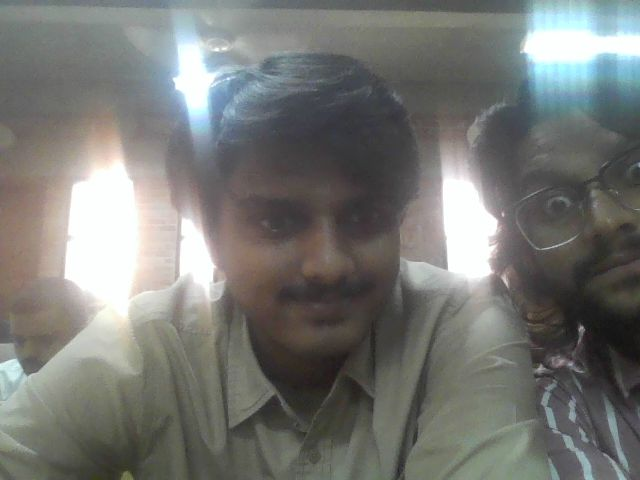

In [9]:
# Function to open the webcam and capture an image
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video feed
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for capture to be pressed
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take a photo using the webcam
filename = take_photo()
print('Saved to {}'.format(filename))

# Display the captured image
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_rgb)
display(img_pil)



0: 480x640 2 persons, 193.7ms
Speed: 3.4ms preprocess, 193.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


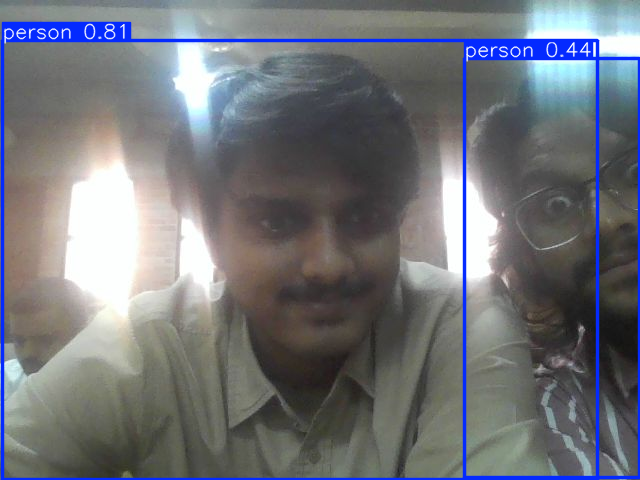

Total objects :  2


In [10]:
# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Load an image
image_path = 'photo.jpg'
image = cv2.imread(image_path)

# Perform inference
results = model(image)
detections = results[0]

# Visualize the results
annotated_image = results[0].plot()

# Display the image using cv2_imshow in Colab
cv2_imshow(annotated_image)

count = len(detections.boxes)
print("Total objects : ", count)